# **Final Project Machine Learning & Data Mining**
- 5054231009: Rafif Fawwaz Kartika
- 5054231015: Dimas Ahmad Satrio Wicaksono
- 5054231022: Naufal Humam Maulana

# **Analisis Performa Algoritma Klasifikasi dan Teknik Boosting dalam Prediksi Resiko COVID-19 pada Pasien dengan Komorbiditas Jantung**

Notebook ini dibuat untuk memprediksi penyakit COVID-19 menggunakan dataset Komorbiditas Penyakit Jantung Pasien. Tujuannya adalah untuk melatih model pembelajaran mesin dan melakukan analisis data mining. Dataset ini terdiri dari 35 kolom dan dapat digunakan untuk memprediksi variabel *Covidpos* berdasarkan data individu setiap pasien.

## **Penjelasan Singkat Setiap Kolom dalam Dataset**

1. **PatientID**: ID unik untuk setiap pasien.  
2. **State**: Negara bagian tempat pasien tinggal.  
3. **Sex**: Jenis kelamin pasien (*Male/Female*).  
4. **GeneralHealth**: Kondisi kesehatan umum pasien (*Excellent, Very Good, Good, Fair, Poor*).  
5. **AgeCategory**: Kategori usia pasien.  
6. **HeightInMeters**: Tinggi badan pasien dalam meter.  
7. **WeightInKilograms**: Berat badan pasien dalam kilogram.  
8. **BMI**: Indeks Massa Tubuh (IMT) pasien, dihitung berdasarkan tinggi dan berat badan.  
9. **HadHeartAttack**: Riwayat serangan jantung (*Yes/No*).  
10. **HadAngina**: Riwayat angina atau nyeri dada (*Yes/No*).  
11. **HadStroke**: Riwayat stroke (*Yes/No*).  
12. **HadAsthma**: Riwayat asma (*Yes/No*).  
13. **HadSkinCancer**: Riwayat kanker kulit (*Yes/No*).  
14. **HadCOPD**: Riwayat Penyakit Paru Obstruktif Kronik (COPD) (*Ya/Tidak*).  
15. **HadDepressiveDisorder**: Riwayat gangguan depresi (*Ya/Tidak*).  
16. **HadKidneyDisease**: Riwayat penyakit ginjal (*Yes/No*).  
17. **HadArthritis**: Riwayat radang sendi (arthritis) (*Yes/No*).  
18. **HadDiabetes**: Riwayat diabetes.  
19. **DeafOrHardOfHearing**: Kesulitan mendengar atau tuli (*Yes/No*).  
20. **BlindOrVisionDifficulty**: Kesulitan melihat atau kebutaan (*Yes/No*).  
21. **DifficultyConcentrating**: Kesulitan berkonsentrasi (*Yes/No*).  
22. **DifficultyWalking**: Kesulitan berjalan (*Yes/No*).  
23. **DifficultyDressingBathing**: Kesulitan berpakaian atau mandi (*Yes/No*).  
24. **DifficultyErrands**: Kesulitan menjalankan tugas sehari-hari (*Yes/No*).  
25. **SmokerStatus**: Status kebiasaan merokok pasien.  
26. **ECigaretteUsage**: Penggunaan rokok elektronik.  
27. **ChestScan**: Pernah menjalani scan dada (*Yes/No*).  
28. **RaceEthnicityCategory**: Kategori ras atau etnis pasien.  
29. **AlcoholDrinkers**: Konsumsi alkohol (*Yes/No*).  
30. **HIVTesting**: Riwayat tes HIV (*Yes/No*).  
31. **FluVaxLast12**: Mendapat vaksin flu dalam 12 bulan terakhir (*Yes/No*).  
32. **PneumoVaxEver**: Pernah mendapat vaksin pneumonia (*Yes/No*).  
33. **TetanusLast10Tdap**: Mendapat vaksin tetanus dalam 10 tahun terakhir.  
34. **HighRiskLastYear**: Risiko tinggi terkena penyakit serius dalam setahun terakhir (*Yes/No*).  
35. **CovidPos**: Hasil tes COVID-19 positif (*Positive/Negative*). **[Target Kolom]**

# **Install and Import Package**

In [67]:
!pip install catboost

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# **Preparation Data**

In [68]:
# Membaca dataset
dataset = pd.read_excel('/kaggle/input/patients-data-used-for-heart-disease/Patients Data ( Used for Heart Disease Prediction ).xlsx')

In [69]:
# Menampilkan jumlah baris dan kolom dataset
dataset.shape

(237630, 35)

In [70]:
# Cek data duplikat
duplicated = dataset.duplicated().sum()
print(duplicated)

0


In [71]:
# Menampilkan info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [72]:
# Menampilkan value counts untuk setiap kolom dari dataset
for i in dataset.columns:
    print (dataset[i].value_counts(), '\n')

PatientID
237630    1
1         1
2         1
3         1
4         1
         ..
34        1
35        1
36        1
37        1
38        1
Name: count, Length: 237630, dtype: int64 

State
Washington              14241
Maryland                 8817
Minnesota                8712
Ohio                     8700
New York                 8625
Texas                    7267
Florida                  7124
Kansas                   6000
Wisconsin                5890
Maine                    5709
Iowa                     5492
Indiana                  5393
South Carolina           5360
Virginia                 5358
Arizona                  5302
Hawaii                   5262
Utah                     5212
Michigan                 5206
Massachusetts            5164
Nebraska                 5008
Colorado                 4973
Georgia                  4860
California               4801
Connecticut              4765
Vermont                  4569
South Dakota             4280
Montana                  415

## Mapping Value

In [73]:
# Mengubah nilai kolom [0, 1] menjadi [0: No, 1: Yes]
cols1 = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear'
]

for col in cols1:
    if col in dataset.columns:
        dataset[col] = dataset[col].replace({0: 'No', 1: 'Yes'})

# Mengubah nilai kolom [1, 0] menjadi [1: Positive, 0: Negative]
cols2 = ['CovidPos']

for col in cols2:
    if col in dataset.columns:
        dataset[col] = dataset[col].replace({1: 'Positive', 0: 'Negative'})

In [74]:
# Menggolongkan nilai kolom ke Yes/No
def categorize(column, values):
    return column.apply(lambda x: "Yes" if x in values else "No")

values = {
    "HadDiabetes": ["Yes", "Yes, but only during pregnancy (female)"],
    "SmokerStatus": ["Current smoker - now smokes every day", "Current smoker - now smokes some days"],
    "ECigaretteUsage": ["Use them some days", "Use them every day"],
    "TetanusLast10Tdap": [
        "Yes, received tetanus shot but not sure what type",
        "Yes, received Tdap",
        "Yes, received tetanus shot, but not Tdap"
    ]
}

for column, vals in values.items():
    dataset[column] = categorize(dataset[column], vals)

In [75]:
# Mapping nilai fitur RaceEthnicityCategory menjadi 3
race_mapping = {
    "White only, Non-Hispanic": "Non-Hispanic White",
    "Hispanic": "Hispanic",
    "Black only, Non-Hispanic": "Non-Hispanic Minority",
    "Other race only, Non-Hispanic": "Non-Hispanic Minority",
    "Multiracial, Non-Hispanic": "Non-Hispanic Minority"
}

dataset['RaceEthnicityCategory'] = dataset['RaceEthnicityCategory'].map(race_mapping)

In [76]:
# Menampilkan 10 baris pertama dataset setelah melakukan mapping value
dataset.head(10)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,No,Yes,...,No,Yes,Non-Hispanic White,No,No,No,Yes,No,No,Positive
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,Yes,No,Negative
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,No,No,...,No,No,Non-Hispanic White,Yes,No,No,No,Yes,No,Negative
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,Yes,No,Negative
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,No,No,...,No,Yes,Non-Hispanic Minority,No,No,Yes,No,No,No,Negative
5,6,Alabama,Male,Very good,Age 75 to 79,1.85,108.860001,31.660000,No,No,...,No,Yes,Non-Hispanic White,Yes,No,No,Yes,No,No,Positive
6,7,Alabama,Female,Good,Age 70 to 74,1.70,74.839996,25.840000,No,No,...,No,Yes,Non-Hispanic Minority,Yes,No,No,No,No,No,Negative
7,8,Alaska,Female,Fair,Age 60 to 64,1.70,87.540001,30.230000,No,No,...,No,No,Non-Hispanic Minority,No,No,No,Yes,No,No,Negative
8,9,Alabama,Female,Fair,Age 80 or older,1.70,90.720001,31.320000,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,No,No,Positive
9,10,Alabama,Female,Good,Age 80 or older,1.55,79.379997,33.070000,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,No,No,Negative


In [77]:
# Menampilkan nilai unik dataset setelah melakukan mapping value
dataset.nunique()

PatientID                    237630
State                            54
Sex                               2
GeneralHealth                     5
AgeCategory                      13
HeightInMeters                  101
WeightInKilograms               513
BMI                            3503
HadHeartAttack                    2
HadAngina                         2
HadStroke                         2
HadAsthma                         2
HadSkinCancer                     2
HadCOPD                           2
HadDepressiveDisorder             2
HadKidneyDisease                  2
HadArthritis                      2
HadDiabetes                       2
DeafOrHardOfHearing               2
BlindOrVisionDifficulty           2
DifficultyConcentrating           2
DifficultyWalking                 2
DifficultyDressingBathing         2
DifficultyErrands                 2
SmokerStatus                      2
ECigaretteUsage                   2
ChestScan                         2
RaceEthnicityCategory       

In [78]:
# Mengambil 100,000 baris pertama dari dataset
subset_data = dataset.iloc[:100000]
subset_data.to_csv('subset_dataset.csv', index=False)

In [79]:
# Membaca data subset
data = pd.read_csv('subset_dataset.csv')

# **Exploratory Data Analysis**

In [80]:
# Menampilkan 10 baris pertama data
data.head(10)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,No,Yes,...,No,Yes,Non-Hispanic White,No,No,No,Yes,No,No,Positive
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,Yes,No,Negative
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,No,No,...,No,No,Non-Hispanic White,Yes,No,No,No,Yes,No,Negative
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,Yes,No,Negative
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,No,No,...,No,Yes,Non-Hispanic Minority,No,No,Yes,No,No,No,Negative
5,6,Alabama,Male,Very good,Age 75 to 79,1.85,108.860001,31.660000,No,No,...,No,Yes,Non-Hispanic White,Yes,No,No,Yes,No,No,Positive
6,7,Alabama,Female,Good,Age 70 to 74,1.70,74.839996,25.840000,No,No,...,No,Yes,Non-Hispanic Minority,Yes,No,No,No,No,No,Negative
7,8,Alaska,Female,Fair,Age 60 to 64,1.70,87.540001,30.230000,No,No,...,No,No,Non-Hispanic Minority,No,No,No,Yes,No,No,Negative
8,9,Alabama,Female,Fair,Age 80 or older,1.70,90.720001,31.320000,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,No,No,Positive
9,10,Alabama,Female,Good,Age 80 or older,1.55,79.379997,33.070000,No,No,...,No,No,Non-Hispanic White,No,No,Yes,Yes,No,No,Negative


In [81]:
# Menampilkan jumlah baris dan kolom data
data.shape

(100000, 35)

In [82]:
# Menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  100000 non-null  int64  
 1   State                      100000 non-null  object 
 2   Sex                        100000 non-null  object 
 3   GeneralHealth              100000 non-null  object 
 4   AgeCategory                100000 non-null  object 
 5   HeightInMeters             100000 non-null  float64
 6   WeightInKilograms          100000 non-null  float64
 7   BMI                        100000 non-null  float64
 8   HadHeartAttack             100000 non-null  object 
 9   HadAngina                  100000 non-null  object 
 10  HadStroke                  100000 non-null  object 
 11  HadAsthma                  100000 non-null  object 
 12  HadSkinCancer              100000 non-null  object 
 13  HadCOPD                    100

In [83]:
# Menampilkan deskripsi data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,100000.0,50000.500000,28867.657797,1.00,25000.750000,50000.500000,75000.25,100000.000000
HeightInMeters,100000.0,1.704203,0.107157,0.91,1.630000,1.700000,1.78,2.360000
WeightInKilograms,100000.0,83.263699,21.309960,29.48,68.040001,81.650002,95.25,292.570007
BMI,100000.0,28.578461,6.511902,12.16,24.200001,27.440001,31.75,97.650002


In [84]:
# Menampilkan kolom data
data.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [85]:
# Menggolongkan kolom data menjadi categorical dan numerical
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Variables: \n", cat_cols, "\n")
print("Numerical Variables: \n", num_cols, "\n")

Categorical Variables: 
 ['State', 'Sex', 'GeneralHealth', 'AgeCategory', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'] 

Numerical Variables: 
 ['PatientID', 'HeightInMeters', 'WeightInKilograms', 'BMI'] 



In [86]:
# Menampilkan nilai unik data
data.nunique()

PatientID                    100000
State                            37
Sex                               2
GeneralHealth                     5
AgeCategory                      13
HeightInMeters                   88
WeightInKilograms               453
BMI                            2931
HadHeartAttack                    2
HadAngina                         2
HadStroke                         2
HadAsthma                         2
HadSkinCancer                     2
HadCOPD                           2
HadDepressiveDisorder             2
HadKidneyDisease                  2
HadArthritis                      2
HadDiabetes                       2
DeafOrHardOfHearing               2
BlindOrVisionDifficulty           2
DifficultyConcentrating           2
DifficultyWalking                 2
DifficultyDressingBathing         2
DifficultyErrands                 2
SmokerStatus                      2
ECigaretteUsage                   2
ChestScan                         2
RaceEthnicityCategory       

In [87]:
# Menampilkan value counts untuk setiap kolom dari data
for i in data.columns:
    print (data[i].value_counts(), '\n')

PatientID
99961    1
99962    1
99963    1
99964    1
99965    1
        ..
4        1
5        1
6        1
7        1
8        1
Name: count, Length: 100000, dtype: int64 

State
Maryland                8817
Florida                 7124
Kansas                  6000
Maine                   5709
Iowa                    5492
Indiana                 5393
Arizona                 5302
Hawaii                  5262
Massachusetts           5164
Colorado                4973
Georgia                 4860
California              4801
Connecticut             4765
Michigan                3426
Idaho                   3394
Alaska                  3100
Louisiana               2958
Arkansas                2881
Illinois                2516
Kentucky                2381
Delaware                2079
Alabama                 1880
District of Columbia    1648
Minnesota                 41
Washington                10
New Jersey                 5
Utah                       3
Texas                      3
Ohio   

In [88]:
# Memilih kolom untuk analisis distribusinya
cols_plot = ['Sex', 'GeneralHealth', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'TetanusLast10Tdap', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos']

color_palette = sns.color_palette("Set1", len(cols_plot))

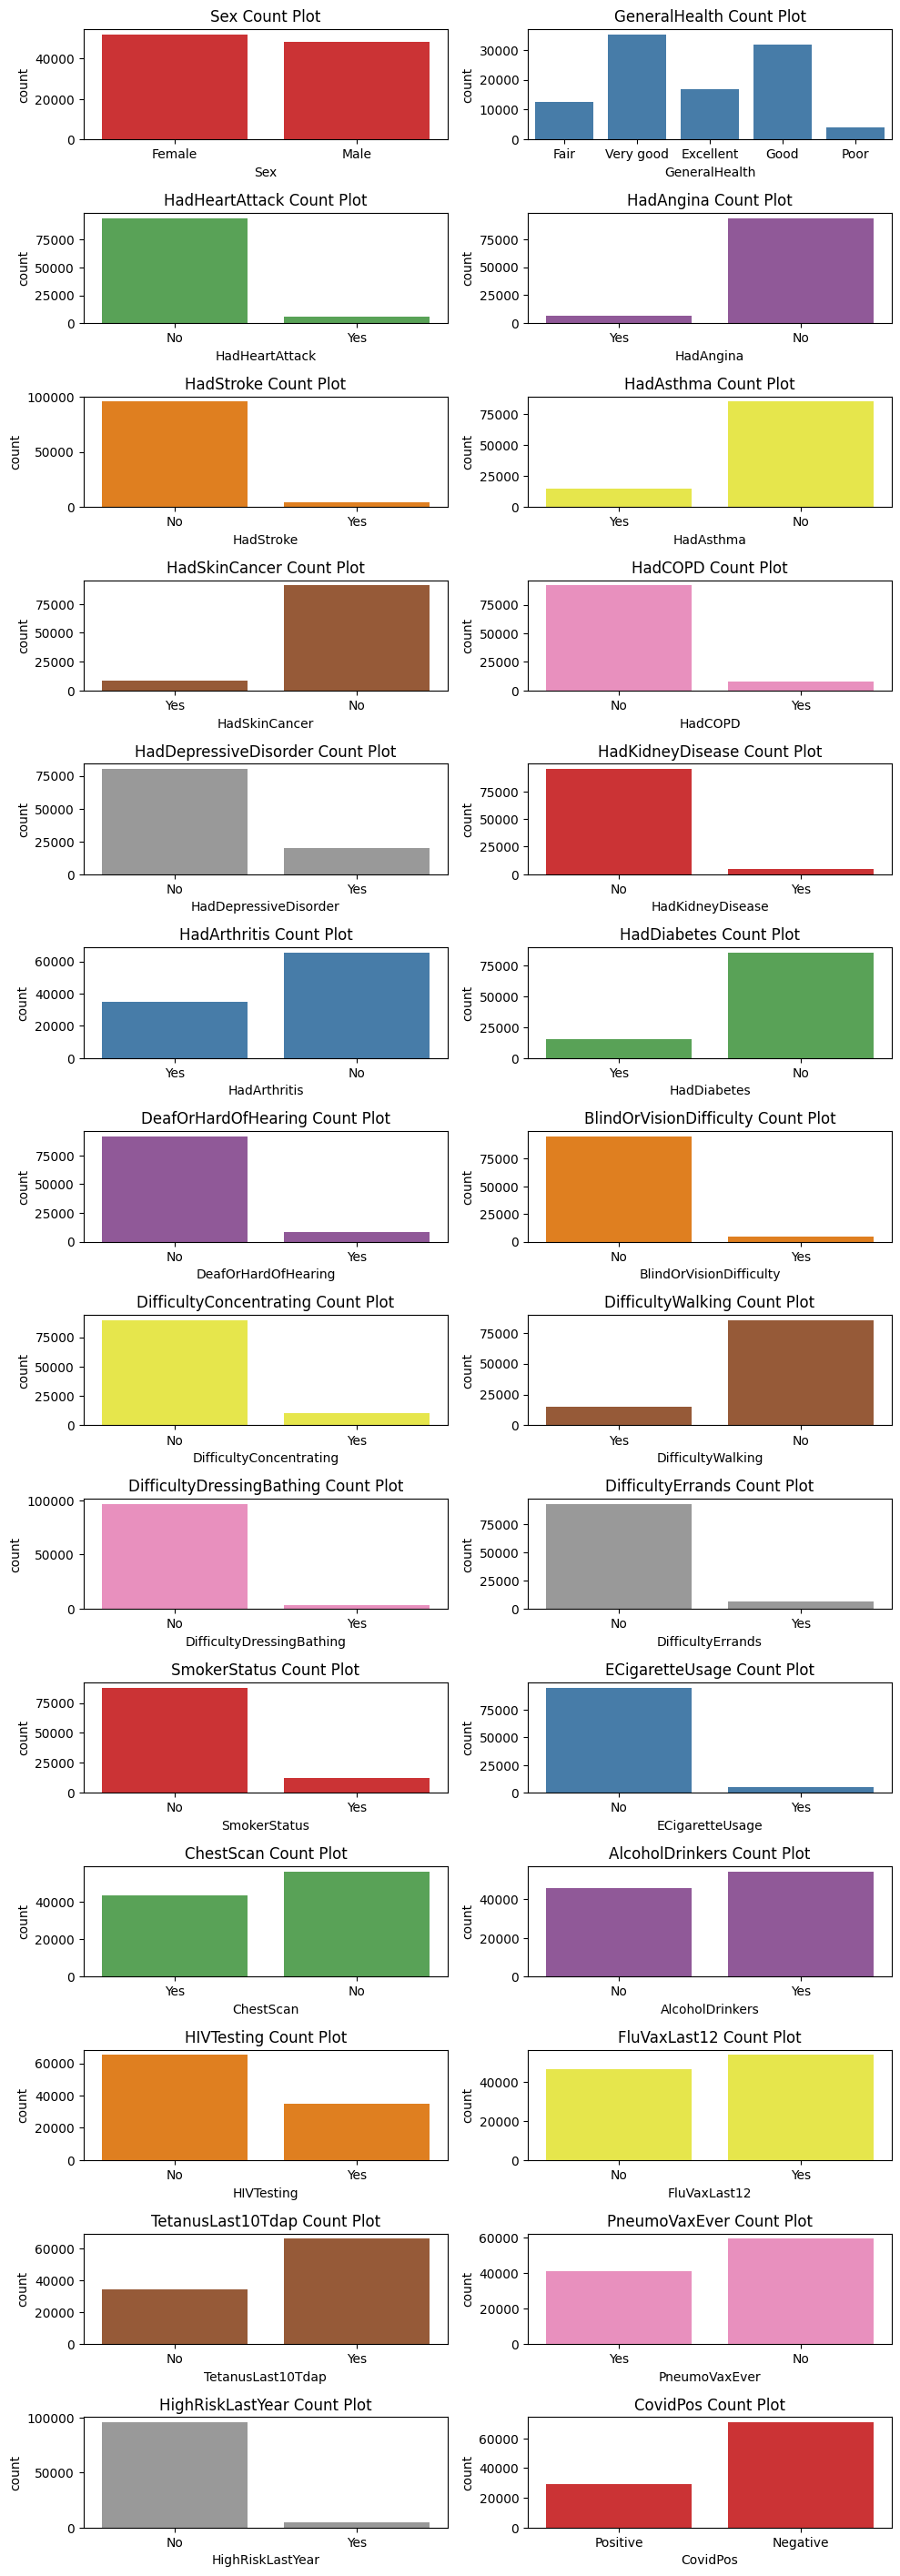

In [89]:
# Menampilkan count plot
plt.figure(figsize=(10, 30))
for i, column in enumerate(cols_plot, 1):
    plt.subplot((len(cols_plot)//2)+1, 2, i)
    sns.countplot(data=data, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Count Plot')
plt.tight_layout()
plt.show()

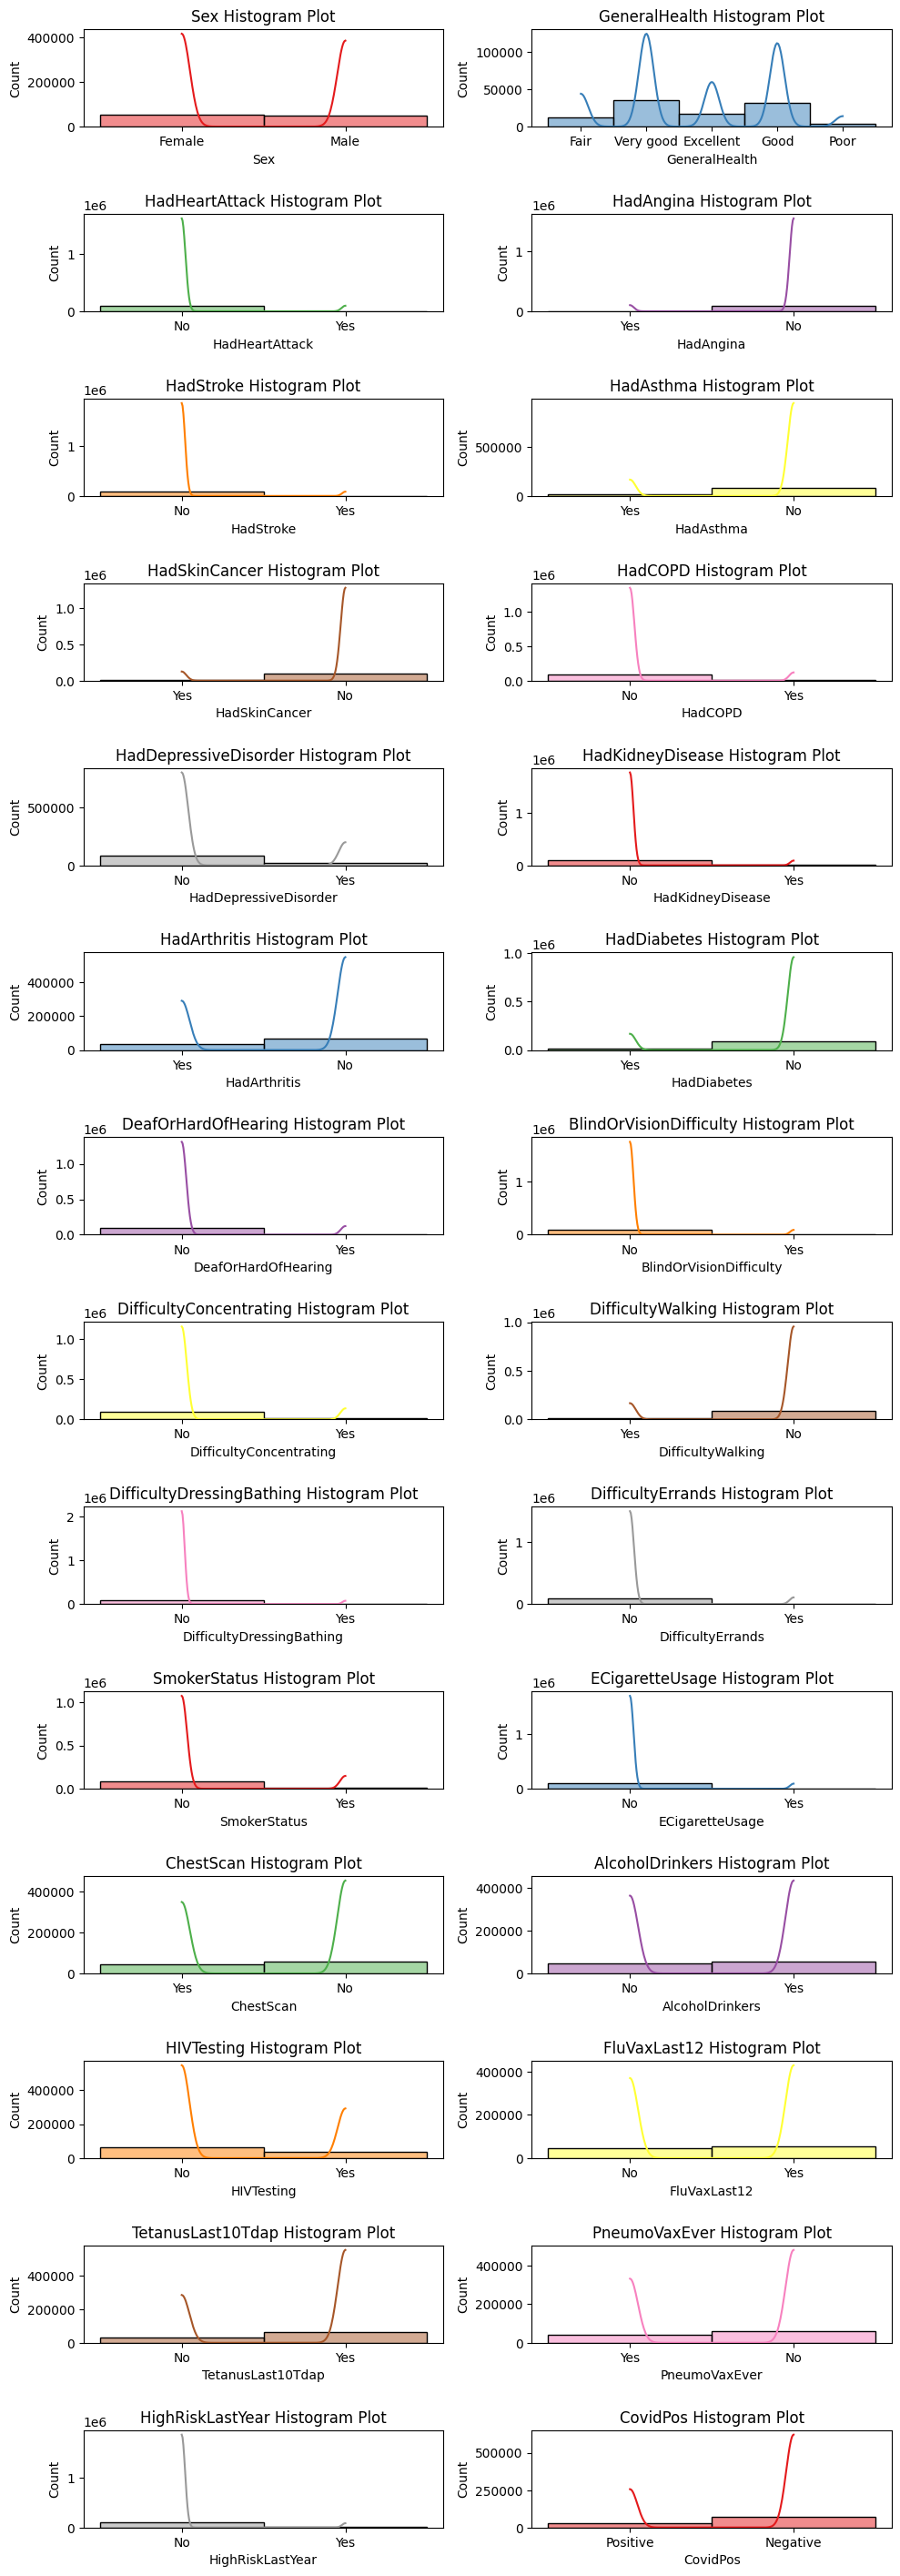

In [90]:
# Menampilkan histogram plot
plt.figure(figsize=(10, 30))
for i, column in enumerate(cols_plot, 1):
    plt.subplot((len(cols_plot)//2)+1, 2, i)
    sns.histplot(data=data, x=column, color=color_palette[i - 1], kde=True)
    plt.xlabel(column)
    plt.title(f'{column} Histogram Plot')
plt.tight_layout()
plt.show()

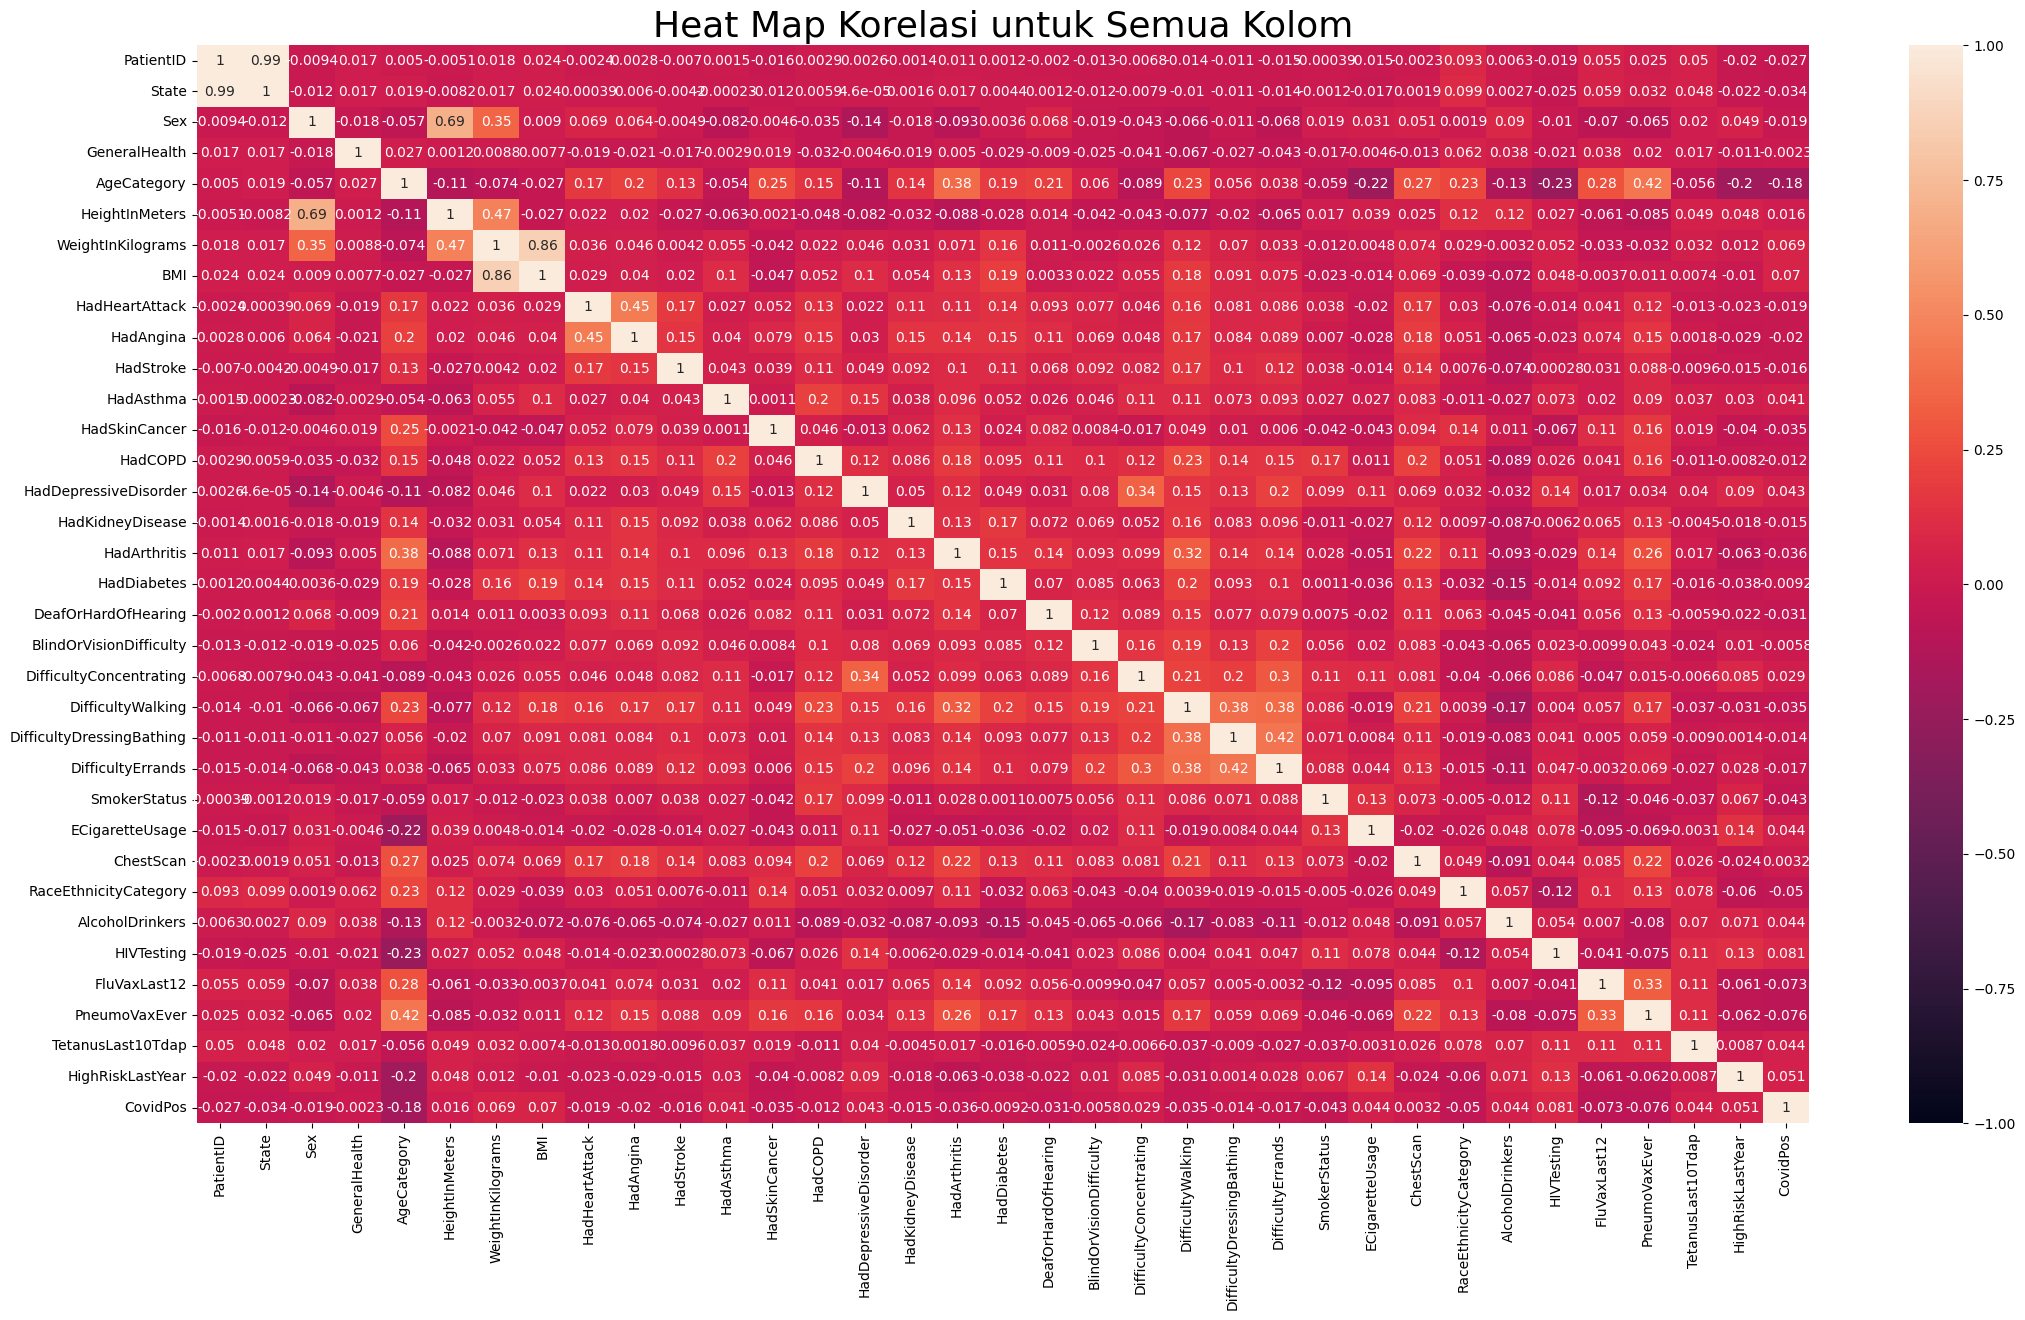

In [91]:
# Menampilkan heat map
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

correlation_matrix = data.corr()

plt.figure(figsize=(26, 14))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.title(f'Heat Map Korelasi untuk Semua Kolom', fontsize=26)
plt.show()

In [92]:
# Cek korelasi keseluruhan kolom dengan kolom CovidPos
target_corr = correlation_matrix['CovidPos'].sort_values(ascending=False)
print("Korelasi dengan kolom CovidPos:")
print(target_corr)

Korelasi dengan kolom CovidPos:
CovidPos                     1.000000
HIVTesting                   0.080644
BMI                          0.070278
WeightInKilograms            0.069175
HighRiskLastYear             0.050782
TetanusLast10Tdap            0.044470
ECigaretteUsage              0.044420
AlcoholDrinkers              0.043601
HadDepressiveDisorder        0.042584
HadAsthma                    0.041457
DifficultyConcentrating      0.028820
HeightInMeters               0.016499
ChestScan                    0.003179
GeneralHealth               -0.002265
BlindOrVisionDifficulty     -0.005775
HadDiabetes                 -0.009244
HadCOPD                     -0.012372
DifficultyDressingBathing   -0.014104
HadKidneyDisease            -0.014978
HadStroke                   -0.016302
DifficultyErrands           -0.017078
HadHeartAttack              -0.019098
Sex                         -0.019249
HadAngina                   -0.020246
PatientID                   -0.026909
DeafOrHardOfHearin

# **Preprocessing Data**

In [93]:
# Copy subset data
df = data.copy()

## Missing Value

In [94]:
# Cek missing value
missing_value = df.isnull().sum()

missing_value

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

## Feature Engineering

In [95]:
# Mengelompokkan kategori usia menjadi risiko rendah, sedang, dan tinggi
def classify_age_risk(age_numeric):
    if age_numeric in [0, 1, 2, 3]:  # Usia muda
        return 0 # Low
    elif age_numeric in [4, 5, 6, 7]:  # Usia pertengahan
        return 1 # Medium
    elif age_numeric in [8, 9, 10, 11, 12]:  # Usia tua
        return 2 # High

df['AgeRiskCategory'] = df['AgeCategory'].apply(classify_age_risk)

In [96]:
# Menjumlahkan semua kolom komorbid
comorbid_columns = [
    "HadHeartAttack", "HadAngina", "HadStroke", "HadAsthma", 
    "HadSkinCancer", "HadCOPD", "HadDepressiveDisorder", 
    "HadKidneyDisease", "HadArthritis", "HadDiabetes"
]

df['TotalComorbid'] = df[comorbid_columns].sum(axis=1)

In [97]:
# Kategorikan berdasarkan jumlah komorbid
def classify_comorbid_risk(total_comorbid):
    if total_comorbid == 0:
        return 0 # Low
    elif 1 <= total_comorbid <= 3:
        return 1 # Medium
    else:
        return 2 # High

df['ComorbidRiskCategory'] = df['TotalComorbid'].apply(classify_comorbid_risk)

In [98]:
# Menghitung total kesulitan
difficulty_columns = [
    "DifficultyConcentrating", "DifficultyWalking", 
    "DifficultyDressingBathing", "DifficultyErrands"
]
df['FunctionalDifficulty'] = df[difficulty_columns].sum(axis=1)

In [99]:
# Kategorikan berdasarkan jumlah kesulitan
def classify_functional_risk(difficulty_score):
    if difficulty_score == 0:
        return 0 # Low
    elif 1 <= difficulty_score <= 2:
        return 1 # Medium
    else:
        return 2 # High

df['FunctionalRiskCategory'] = df['FunctionalDifficulty'].apply(classify_functional_risk)

In [100]:
# Hitung total vaksin yang pernah diambil
vaccine_columns = ["FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap"]
df['VaccineAwareness'] = df[vaccine_columns].sum(axis=1)

In [101]:
# Kategorikan berdasarkan jumlah vaksin
def classify_vaccine_awareness(vaccine_count):
    if vaccine_count == 0:
        return 0 # Low
    elif vaccine_count == 1:
        return 1 # Medium
    else:
        return 2 # High

df['VaccineAwarenessCategory'] = df['VaccineAwareness'].apply(classify_vaccine_awareness)

In [102]:
# Menampilkan 10 baris pertama data setelah menambahkan feature engineering
df.head(10)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeRiskCategory,TotalComorbid,ComorbidRiskCategory,FunctionalDifficulty,FunctionalRiskCategory,VaccineAwareness,VaccineAwarenessCategory
0,1,0,0,1,11,1.63,84.820000,32.099998,0,1,...,0,0,1,2,5,2,1,1,1,1
1,2,0,0,4,9,1.60,71.669998,27.990000,0,0,...,1,0,0,2,1,1,0,0,3,2
2,3,0,1,0,8,1.78,71.209999,22.530001,0,0,...,1,0,0,2,0,0,0,0,1,1
3,4,0,1,4,10,1.78,95.250000,30.129999,0,0,...,1,0,0,2,2,1,0,0,3,2
4,5,0,0,2,6,1.68,78.019997,27.760000,0,0,...,0,0,0,1,0,0,0,0,1,1
5,6,0,1,4,11,1.85,108.860001,31.660000,0,0,...,0,0,1,2,1,1,1,1,1,1
6,7,0,0,2,10,1.70,74.839996,25.840000,0,0,...,0,0,0,2,1,1,0,0,0,0
7,8,1,0,1,8,1.70,87.540001,30.230000,0,0,...,0,0,0,2,2,1,3,2,1,1
8,9,0,0,1,12,1.70,90.720001,31.320000,0,0,...,0,0,1,2,3,1,1,1,2,2
9,10,0,0,2,12,1.55,79.379997,33.070000,0,0,...,0,0,0,2,1,1,0,0,2,2


In [103]:
# Cek korelasi keseluruhan kolom setelah menambahkan feature engineering
correlation_matrix = df.corr()

target_corr = correlation_matrix['CovidPos'].sort_values(ascending=False)
print("Korelasi dengan kolom CovidPos:")
print(target_corr)

Korelasi dengan kolom CovidPos:
CovidPos                     1.000000
HIVTesting                   0.080644
BMI                          0.070278
WeightInKilograms            0.069175
HighRiskLastYear             0.050782
TetanusLast10Tdap            0.044470
ECigaretteUsage              0.044420
AlcoholDrinkers              0.043601
HadDepressiveDisorder        0.042584
HadAsthma                    0.041457
DifficultyConcentrating      0.028820
HeightInMeters               0.016499
ChestScan                    0.003179
GeneralHealth               -0.002265
BlindOrVisionDifficulty     -0.005775
HadDiabetes                 -0.009244
FunctionalRiskCategory      -0.011937
ComorbidRiskCategory        -0.012350
HadCOPD                     -0.012372
TotalComorbid               -0.013321
FunctionalDifficulty        -0.013773
DifficultyDressingBathing   -0.014104
HadKidneyDisease            -0.014978
HadStroke                   -0.016302
DifficultyErrands           -0.017078
HadHeartAttack    

## Feature Selection

In [104]:
# Menentukan threshold untuk feature selection
threshold = 0.05

selected_features = target_corr[abs(target_corr) >= threshold]

print("Fitur terpilih berdasarkan korelasi:")
print(selected_features)

Fitur terpilih berdasarkan korelasi:
CovidPos                 1.000000
HIVTesting               0.080644
BMI                      0.070278
WeightInKilograms        0.069175
HighRiskLastYear         0.050782
RaceEthnicityCategory   -0.050105
VaccineAwareness        -0.053099
FluVaxLast12            -0.072501
PneumoVaxEver           -0.076187
AgeRiskCategory         -0.170101
AgeCategory             -0.183826
Name: CovidPos, dtype: float64


In [105]:
# Mengambil nama-nama fitur yang terpilih berdasarkan korelasi
feature_names = selected_features.index.tolist()

filtered_df = df[feature_names]

In [106]:
# Menampilkan 10 baris pertama data setelah melakukan feature selection
filtered_df.head(10)

,CovidPos,HIVTesting,BMI,WeightInKilograms,HighRiskLastYear,RaceEthnicityCategory,VaccineAwareness,FluVaxLast12,PneumoVaxEver,AgeRiskCategory,AgeCategory
0,1,0,32.099998,84.820000,0,2,1,0,1,2,11
1,0,0,27.990000,71.669998,0,2,3,1,1,2,9
2,0,0,22.530001,71.209999,0,2,1,0,0,2,8
3,0,0,30.129999,95.250000,0,2,3,1,1,2,10
4,0,0,27.760000,78.019997,0,1,1,1,0,1,6
5,1,0,31.660000,108.860001,0,2,1,0,1,2,11
6,0,0,25.840000,74.839996,0,1,0,0,0,2,10
7,0,0,30.230000,87.540001,0,1,1,0,1,2,8
8,1,0,31.320000,90.720001,0,2,2,1,1,2,12
9,0,0,33.070000,79.379997,0,2,2,1,1,2,12


In [107]:
# Menyimpan data yang sudah difilter ke dalam file CSV
# filtered_df.to_csv('filtered_dataset.csv', index=False)

# **Modeling Data**

## Model 1 (Data Asli)

In [108]:
# Data Asli
df1 = filtered_df.copy()

In [109]:
# Pisahkan data menjadi data train dan data test
X = df1.drop(columns=['CovidPos'])
y = df1['CovidPos']
rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [110]:
# Classifier Algorithm
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=rs)),
    ("Decision Tree", DecisionTreeClassifier(random_state=rs)),
    ("Random Forest", RandomForestClassifier(random_state=rs)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC(kernel='linear', random_state=rs)),
    ("Gaussian Naive Bayes", GaussianNB())
]

results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
4,Support Vector Classifier,0.70645,0.499132,0.70645,0.584965
0,Logistic Regression,0.70560,0.637425,0.70560,0.595353
5,Gaussian Naive Bayes,0.66400,0.635196,0.66400,0.644886
3,K-Nearest Neighbors,0.65510,0.608900,0.65510,0.622494
2,Random Forest,0.65050,0.607517,0.65050,0.621111
1,Decision Tree,0.62230,0.605682,0.62230,0.612975


In [111]:
# Boosting
boosting = [
    ("AdaBoost", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, random_state=rs)),
    ("Gradient Boosting", GradientBoostingClassifier(learning_rate=0.1, random_state=rs)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, random_state=rs, verbosity=0)),
    ("LightGBM", LGBMClassifier(learning_rate=0.1, random_state=rs, verbose=-1)),
    ("CatBoost", CatBoostClassifier(random_state=rs, verbose=0))
]

results = []

for name, bst in boosting:
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,AdaBoost,0.70650,0.499142,0.70650,0.584989
1,Gradient Boosting,0.70645,0.644771,0.70645,0.588805
3,LightGBM,0.70545,0.639406,0.70545,0.598939
4,CatBoost,0.70500,0.640285,0.70500,0.604208
2,XGBoost,0.70455,0.633728,0.70455,0.599509


## Model 2 (Data Asli + Normalisasi)

In [112]:
# Data Asli + Normalisasi
df2 = filtered_df.copy()

In [113]:
# Pisahkan data menjadi data train dan data test
X = df2.drop(columns=['CovidPos'])
y = df2['CovidPos']
rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [114]:
# StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [115]:
# Classifier Algorithm
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=rs)),
    ("Decision Tree", DecisionTreeClassifier(random_state=rs)),
    ("Random Forest", RandomForestClassifier(random_state=rs)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC(kernel='linear', random_state=rs)),
    ("Gaussian Naive Bayes", GaussianNB())
]

results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
4,Support Vector Classifier,0.7065,0.499142,0.7065,0.584989
0,Logistic Regression,0.7055,0.636368,0.7055,0.595300
5,Gaussian Naive Bayes,0.6640,0.635196,0.6640,0.644886
3,K-Nearest Neighbors,0.6603,0.617695,0.6603,0.629951
2,Random Forest,0.6505,0.607695,0.6505,0.621252
1,Decision Tree,0.6224,0.605707,0.6224,0.613027


In [116]:
# Boosting
boosting = [
    ("AdaBoost", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, random_state=rs)),
    ("Gradient Boosting", GradientBoostingClassifier(learning_rate=0.1, random_state=rs)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, random_state=rs, verbosity=0)),
    ("LightGBM", LGBMClassifier(learning_rate=0.1, random_state=rs, verbose=-1)),
    ("CatBoost", CatBoostClassifier(random_state=rs, verbose=0))
]

results = []

for name, bst in boosting:
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,AdaBoost,0.70650,0.499142,0.70650,0.584989
1,Gradient Boosting,0.70645,0.644771,0.70645,0.588805
3,LightGBM,0.70625,0.646153,0.70625,0.599454
4,CatBoost,0.70500,0.640285,0.70500,0.604208
2,XGBoost,0.70455,0.633728,0.70455,0.599509


## Model 3 (Data Resampling)

In [117]:
# Data Resampling
df3 = filtered_df.copy()

In [118]:
# Pisahkan data menjadi data train dan data test
X = df3.drop(columns=['CovidPos'])
y = df3['CovidPos']
rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [119]:
# SMOTE
smote = SMOTE(random_state=rs)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_resampled, columns=X_train.columns)
y_train = pd.Series(y_resampled)

In [120]:
# Classifier Algorithm
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=rs)),
    ("Decision Tree", DecisionTreeClassifier(random_state=rs)),
    ("Random Forest", RandomForestClassifier(random_state=rs)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC(kernel='linear', random_state=rs)),
    ("Gaussian Naive Bayes", GaussianNB())
]

results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
4,Support Vector Classifier,0.61275,0.660879,0.61275,0.627925
0,Logistic Regression,0.60300,0.659140,0.60300,0.619524
2,Random Forest,0.59940,0.611844,0.59940,0.605082
1,Decision Tree,0.59430,0.605665,0.59430,0.599550
5,Gaussian Naive Bayes,0.58965,0.648919,0.58965,0.607003
3,K-Nearest Neighbors,0.57340,0.615326,0.57340,0.588634


In [121]:
# Boosting
boosting = [
    ("AdaBoost", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, random_state=rs)),
    ("Gradient Boosting", GradientBoostingClassifier(learning_rate=0.1, random_state=rs)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, random_state=rs, verbosity=0)),
    ("LightGBM", LGBMClassifier(learning_rate=0.1, random_state=rs, verbose=-1)),
    ("CatBoost", CatBoostClassifier(random_state=rs, verbose=0))
]

results = []

for name, bst in boosting:
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
4,CatBoost,0.62045,0.650060,0.62045,0.631697
3,LightGBM,0.60385,0.659133,0.60385,0.620250
2,XGBoost,0.60155,0.657807,0.60155,0.618142
1,Gradient Boosting,0.59335,0.661362,0.59335,0.611190
0,AdaBoost,0.59235,0.665110,0.59235,0.610428


## Model 4 (Data Resampling + Normalisasi)

In [122]:
# Data Resampling + Normalisasi
df4 = filtered_df.copy()

In [123]:
# Pisahkan data menjadi data train dan data test
X = df4.drop(columns=['CovidPos'])
y = df4['CovidPos']
rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [124]:
# SMOTE
smote = SMOTE(random_state=rs)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_resampled, columns=X_train.columns)
y_train = pd.Series(y_resampled)

In [125]:
# StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [126]:
# Classifier Algorithm
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=rs)),
    ("Decision Tree", DecisionTreeClassifier(random_state=rs)),
    ("Random Forest", RandomForestClassifier(random_state=rs)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC(kernel='linear', random_state=rs)),
    ("Gaussian Naive Bayes", GaussianNB())
]

results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
4,Support Vector Classifier,0.60640,0.660595,0.60640,0.622583
0,Logistic Regression,0.60260,0.658628,0.60260,0.619128
2,Random Forest,0.59980,0.612156,0.59980,0.605444
1,Decision Tree,0.59455,0.605773,0.59455,0.599739
5,Gaussian Naive Bayes,0.58965,0.648919,0.58965,0.607003
3,K-Nearest Neighbors,0.57540,0.619262,0.57540,0.590983


In [127]:
# Boosting
boosting = [
    ("AdaBoost", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, random_state=rs)),
    ("Gradient Boosting", GradientBoostingClassifier(learning_rate=0.1, random_state=rs)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, random_state=rs, verbosity=0)),
    ("LightGBM", LGBMClassifier(learning_rate=0.1, random_state=rs, verbose=-1)),
    ("CatBoost", CatBoostClassifier(random_state=rs, verbose=0))
]

results = []

for name, bst in boosting:
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
4,CatBoost,0.62045,0.650060,0.62045,0.631697
3,LightGBM,0.60520,0.659399,0.60520,0.621428
2,XGBoost,0.60155,0.657807,0.60155,0.618142
1,Gradient Boosting,0.59335,0.661362,0.59335,0.611190
0,AdaBoost,0.59235,0.665110,0.59235,0.610428


## Confusion Matrix

In [131]:
model1 = LogisticRegression(random_state=rs)
model2 = GradientBoostingClassifier(learning_rate=0.1, random_state=rs)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

lgr_cm = confusion_matrix(y_test, y_pred1)
gbc_cm = confusion_matrix(y_test, y_pred2)

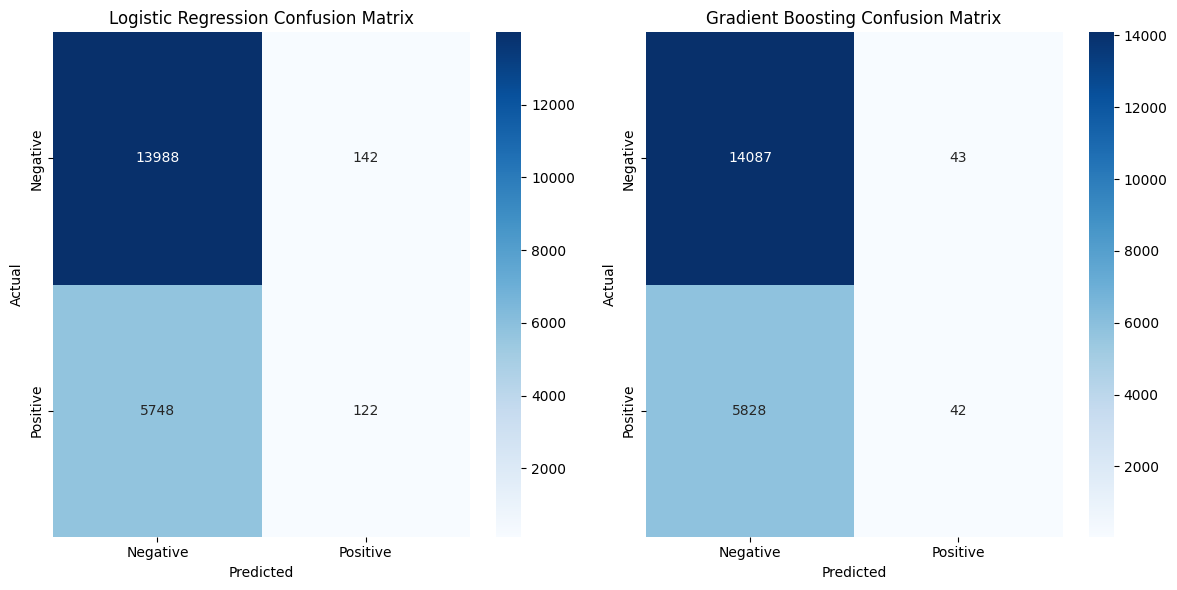

In [132]:
# Confusion Matrix Logistic Regression vs Gradient Boosting
labels = ["Negative", "Positive"]

plt.figure(figsize=(12, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(lgr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Gradient Boosting Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(gbc_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()